In [1]:
import html2text

In [36]:
text_maker = html2text.HTML2Text()
text_maker.ignore_links = True
text_maker.ignore_images = True
text_maker.unicode_snob = True
text_maker.body_width = 0

In [62]:
base_folder = '/home/ilya/hard_drive/mirror/lib.ru/files/full/extracted/'

with open(base_folder + 'pushkin_a_s-text_0030.fb2', 'r') as content_file:
    content = content_file.read()

In [63]:
print(content)

<?xml version="1.0" encoding="utf-8"?>
<FictionBook xmlns="http://www.gribuser.ru/xml/fictionbook/2.1" xmlns:genre="http://www.gribuser.ru/xml/fictionbook/2.1/genres" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xs="http://www.w3.org/2001/XMLSchema">
<description>
	<title-info>
		<genre>detective</genre>
		<author>
			<first-name>Александр</first-name>
			<middle-name>Сергеевич</middle-name>
			<last-name>Пушкин</last-name>
		</author>
		<book-title>Поэмы</book-title>
<annotation><p>Руслан и Людмила;</p>
<p>Кавказский пленник;</p>
<p>Гавриилиада;</p>
<p>Братья-разбойники;</p>
<p>Бахчисарайский фонтан;</p>
<p>Цыганы;</p>
<p>Граф Нулин;</p>
<p>Полтава;</p>
<p>Тазит;</p>
<p>Домик в Коломне;</p>
<p>Анджело;</p>
<p>Медный всадник;</p>
<p>Heзавершeнное, планы, отрывки, наброски;</p>
<p>Из ранних редакций.</p></annotation>		<date value="2006-06-18">18/06/2006</date>
		<lang>ru</lang>
	</title-info>
	<document-info>
		<author>
			<nickname>samlib.ru</nickname>
			<home-page>http://samlib.r

In [64]:
text = text_maker.handle(content)

In [65]:
print(text)

detective Александр Сергеевич Пушкин Поэмы

Руслан и Людмила;

Кавказский пленник;

Гавриилиада;

Братья-разбойники;

Бахчисарайский фонтан;

Цыганы;

Граф Нулин;

Полтава;

Тазит;

Домик в Коломне;

Анджело;

Медный всадник;

Heзавершeнное, планы, отрывки, наброски;

Из ранних редакций.

18/06/2006 ru samlib.ru http://samlib.ru/ samlib.ru 2017-04-17 06:53:00 http://az.lib.ru/p/pushkin_a_s/text_0030.shtml samlib58f4e4e724c5f5.97254336 1.0

Пушкин Александр Сергеевич

Поэмы

Александр Сергеевич Пушкин. Поэмы

\----------------------------------------------------------------------

Собрание Сочинений в десяти томах. Том третий

(Государственное издательство Художественной Литературы. Москва, 1959)

Версия 1.5 от 11 июня 2006 г.

Оригинал здесь: Русская виртуальная библиотека

\----------------------------------------------------------------------

СОДЕРЖАНИЕ:

• Руслан и Людмила

• Кавказский пленник

• Гавриилиада

• Братья-разбойники

• Бахчисарайский фонтан

• Цыганы

• Граф Нулин

• 

In [69]:
import string
exclude = set(string.punctuation)
exclude.remove('.')
exclude.remove('!')
exclude.remove('?')
text = text.replace('--', '.').replace(';', '.')
text = text.lower()
converted = ''.join(ch for ch in text if ch not in exclude)
converted = converted.splitlines()
if 'примечания' in converted:
    converted = converted[:converted.index('примечания')]
    print('Got ya!')
print(len(converted))
converted = [s for s in converted if len(s) > 0]
converted = converted[20::]
converted_text = ' '.join(converted)

Got ya!
7486


In [58]:
print(converted_text)

так в ненастные дни занимались они делом. однажды играли в карты у конногвардейца нарумова. долгая зимняя ночь прошла незаметно сели ужинать в пятом часу утра. те которые остались в выигрыше ели с большим аппетитом прочие в рассеянности сидели перед пустыми своими приборами. но шампанское явилось разговор оживился и все приняли в нем участие. . что ты сделал сурин? . спросил хозяин. . проиграл по обыкновению. надобно признаться что я несчастлив играю мирандолем никогда не горячусь ничем меня с толку не собьешь а все проигрываюсь! . и ты ни разу не соблазнился? ни разу не поставил на руте?.. твердость твоя для меня удивительна. . а каков германн! . сказал один из гостей указывая на молодого инженера . отроду не брал он карты в руки отроду не загнул ни одного пароли а до пяти часов сидит с нами и смотрит на нашу игру! . игра занимает меня сильно . сказал германн . но я не в состоянии жертвовать необходимым в надежде приобрести излишнее. . германн немец он расчетлив вот и все! . заметил т

In [70]:
import re

def is_cyrillic(sym):
    return 'а' <= sym and sym <= 'я'

by_sant = re.split('[.!?]+', converted_text)
by_sant = [s.strip() for s in by_sant if len(s) > 0]
by_sant = [''.join(sym for sym in s if is_cyrillic(sym) or sym ==' ') for s in by_sant]
by_sant = [' '.join(re.split('\W+', s)) for s in by_sant]


In [60]:
print(by_sant)

['так в ненастные дни занимались они делом', 'однажды играли в карты у конногвардейца нарумова', 'долгая зимняя ночь прошла незаметно сели ужинать в пятом часу утра', 'те которые остались в выигрыше ели с большим аппетитом прочие в рассеянности сидели перед пустыми своими приборами', 'но шампанское явилось разговор оживился и все приняли в нем участие', '', 'что ты сделал сурин', '', 'спросил хозяин', '', 'проиграл по обыкновению', 'надобно признаться что я несчастлив играю мирандолем никогда не горячусь ничем меня с толку не собьешь а все проигрываюсь', '', 'и ты ни разу не соблазнился', 'ни разу не поставил на руте', 'твердость твоя для меня удивительна', '', 'а каков германн', '', 'сказал один из гостей указывая на молодого инженера', 'отроду не брал он карты в руки отроду не загнул ни одного пароли а до пяти часов сидит с нами и смотрит на нашу игру', '', 'игра занимает меня сильно', 'сказал германн', 'но я не в состоянии жертвовать необходимым в надежде приобрести излишнее', '', '

In [90]:
total_avg = sum( map(len, by_sant) ) / len(by_sant)
print(total_avg)

45.902460456942


In [91]:
sant_len = [len(s) for s in by_sant]
print(sant_len)

[7, 110, 4, 88, 34, 29, 46, 114, 28, 141, 38, 43, 112, 116, 133, 41, 10, 18, 36, 86, 109, 5, 37, 53, 128, 55, 1, 37, 244, 165, 47, 19, 28, 258, 52, 28, 37, 38, 27, 49, 17, 71, 95, 71, 85, 139, 81, 19, 128, 30, 72, 36, 27, 97, 64, 164, 196, 87, 100, 30, 32, 13, 101, 69, 0, 30, 16, 85, 5, 15, 17, 51, 113, 43, 88, 92, 74, 31, 106, 0, 25, 15, 29, 59, 0, 12, 25, 38, 0, 58, 0, 12, 0, 26, 7, 39, 0, 7, 31, 29, 35, 21, 95, 17, 15, 14, 133, 79, 69, 69, 130, 33, 47, 39, 83, 85, 22, 179, 30, 30, 175, 4, 83, 47, 68, 117, 24, 36, 76, 130, 121, 26, 114, 106, 23, 39, 63, 141, 70, 21, 15, 195, 48, 3, 10, 37, 36, 22, 24, 88, 67, 218, 144, 16, 32, 63, 128, 42, 32, 74, 25, 27, 17, 26, 24, 47, 13, 41, 23, 68, 78, 32, 58, 32, 0, 24, 21, 12, 29, 0, 10, 0, 23, 25, 12, 89, 69, 17, 27, 21, 17, 127, 19, 15, 59, 20, 41, 82, 15, 57, 66, 45, 40, 33, 88, 15, 50, 1, 6, 144, 27, 29, 18, 137, 3, 5, 0, 27, 15, 37, 6, 0, 61, 41, 19, 35, 207, 10, 43, 59, 71, 16, 0, 18, 17, 20, 28, 22, 11, 97, 10, 18, 76, 0, 11, 16, 45, 68

(array([ 1.,  0.,  0.,  0.,  3.,  0., 10.,  0.,  2.,  0.,  2.,  0.,  0.,
         7.,  0.,  4.,  0.,  5.,  0.,  4.,  0.,  8.,  0.,  7.,  0.,  0.,
         3.,  0., 14.,  0., 10.,  0., 20.,  0.,  6.,  0., 11.,  0.,  0.,
        12.,  0., 19.,  0.,  6.,  0.,  4.,  0.,  6.,  0.,  0., 10.,  0.,
         4.,  0.,  7.,  0., 14.,  0., 11.,  0.,  5.,  0.,  0.,  4.,  0.,
        13.,  0., 16.,  0.,  6.,  0.,  6.,  0.,  4.,  0.,  0., 13.,  0.,
         5.,  0.,  1.,  0.,  7.,  0.,  4.,  0.,  0., 10.,  0., 11.,  0.,
         8.,  0.,  8.,  0.,  7.,  0.,  4.,  0.,  0.,  8.,  0.,  4.,  0.,
         5.,  0.,  4.,  0.,  3.,  0.,  6.,  0.,  0.,  6.,  0.,  7.,  0.,
         3.,  0.,  7.,  0.,  8.,  0.,  0.,  6.,  0.,  7.,  0.,  3.,  0.,
         4.,  0.,  5.,  0.,  4.,  0.,  0.,  3.,  0.,  6.,  0.,  6.,  0.,
         3.,  0.,  8.,  0.,  2.,  0.,  0.,  5.,  0.,  6.,  0.,  5.,  0.,
         4.,  0.,  3.,  0.,  0., 10.,  0.,  2.,  0.,  3.,  0.,  5.,  0.,
         3.,  0.,  1.,  0.,  0.,  2.,  0.,  2.,  0.

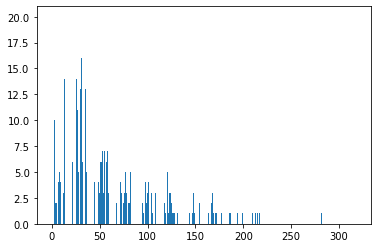

In [35]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.hist(sant_len, len(sant_len))

In [92]:
for s in by_sant:
    if len(s) > 230:
        print(s)
        print()

но как вино подавалось у нас только за обедом и то по рюмочке причем учителя обыкновенно и обносили то мой бопре очень скоро привык к русской настойке и даже стал предпочитать ее винам своего отечества как не в пример более полезную для желудка

но вскоре судьба нас разлучила и вот по какому случаю прачка палашка толстая и рябая девка и кривая коровница акулька както согласились в одно время кинуться матушке в ноги винясь в преступной слабости и с плачем жалуясь на мусье обольстившего их неопытность

незаметным образом я привязался к доброму семейству даже к ивану игнатьичу кривому гарнизонному поручику о котором швабрин выдумал будто бы он был в непозволительной связи с василисой егоровной что не имело и тени правдоподобия но швабрин о том не беспокоился

коли уж мне и вмешаться в это дело так разве пойти к ивану кузмичу да донести ему по долгу службы что в фортеции умышляется злодействие противное казенному интересу не благоугодно ли будет господину коменданту принять надлежащие меры

In [14]:
def char2num(sym):
    if sym == ' ':
        return 2000
    return int.from_bytes(sym.encode('utf8'), byteorder='big') - int.from_bytes('а'.encode('utf8'), byteorder='big')

def num2char(num):
    if num == 2000:
        return ' '
    return (int.from_bytes('а'.encode('utf8'), byteorder='big') + num).to_bytes(2, byteorder='big').decode('utf8')

sant_num = [[char2num(ch) for ch in s] for s in by_sant]
sant_from_num = [''.join([num2char(num) for num in ar]) for ar in sant_num]

In [30]:
print(sant_from_num)

['на сто и выигрывали и отписывали мелом', 'так в ненастные дни занимались они делом', 'однажды играли в карты у конногвардейца нарумова', 'долгая зимняя ночь прошла незаметно сели ужинать в пятом часу утра', 'те которые остались в выигрыше ели с большим аппетитом прочие в рассеянности сидели перед пустыми своими приборами', 'но шампанское явилось разговор оживился и все приняли в нем участие', '', 'что ты сделал сурин', '', 'спросил хозяин', '', 'проиграл по обыкновению', 'надобно признаться что я несчастлив играю мирандолем никогда не горячусь ничем меня с толку не собьешь а все проигрываюсь', '', 'и ты ни разу не соблазнился', 'ни разу не поставил на руте', 'твердость твоя для меня удивительна', '', 'а каков германн', '', 'сказал один из гостей указывая на молодого инженера', 'отроду не брал он карты в руки отроду не загнул ни одного пароли а до пяти часов сидит с нами и смотрит на нашу игру', '', 'игра занимает меня сильно', 'сказал германн', 'но я не в состоянии жертвовать необход

In [11]:
print(sant_num)

[[13, 0, 2000, 209, 210, 14, 2000, 8, 2000, 2, 219, 8, 3, 208, 219, 2, 0, 11, 8, 2000, 8, 2000, 14, 210, 15, 8, 209, 219, 2, 0, 11, 8, 2000, 12, 5, 11, 14, 12], [210, 0, 10, 2000, 2, 2000, 13, 5, 13, 0, 209, 210, 13, 219, 5, 2000, 4, 13, 8, 2000, 7, 0, 13, 8, 12, 0, 11, 8, 209, 220, 2000, 14, 13, 8, 2000, 4, 5, 11, 14, 12], [14, 4, 13, 0, 6, 4, 219, 2000, 8, 3, 208, 0, 11, 8, 2000, 2, 2000, 10, 0, 208, 210, 219, 2000, 211, 2000, 10, 14, 13, 13, 14, 3, 2, 0, 208, 4, 5, 9, 214, 0, 2000, 13, 0, 208, 211, 12, 14, 2, 0], [4, 14, 11, 3, 0, 223, 2000, 7, 8, 12, 13, 223, 223, 2000, 13, 14, 215, 220, 2000, 15, 208, 14, 216, 11, 0, 2000, 13, 5, 7, 0, 12, 5, 210, 13, 14, 2000, 209, 5, 11, 8, 2000, 211, 6, 8, 13, 0, 210, 220, 2000, 2, 2000, 15, 223, 210, 14, 12, 2000, 215, 0, 209, 211, 2000, 211, 210, 208, 0], [210, 5, 2000, 10, 14, 210, 14, 208, 219, 5, 2000, 14, 209, 210, 0, 11, 8, 209, 220, 2000, 2, 2000, 2, 219, 8, 3, 208, 219, 216, 5, 2000, 5, 11, 8, 2000, 209, 2000, 1, 14, 11, 220, 216, 8, 1

In [28]:
'а'.encode('utf8')

b'\xd0\xb0'

In [29]:
'р'.encode('utf8')

b'\xd1\x80'

In [71]:
with open(base_folder + 'converted', 'a') as f:
    for sant in by_sant:
        s = sant.strip()
        if len(s) > 0:
            print(s, file=f)

In [19]:
char2num('р')

208

In [32]:
end_marker = 'примечания'
end_index = by_sant.index(end_marker) if end_marker in by_sant else None
print(end_index)

None
